In [1]:
from preprocessing import *
import pickle
from joblib import load
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# train_data
df_train, cols, X_train, X_valid, y_train, y_valid = preprocessing(test_size=0.3, file_path='/Users/woojinheo/Desktop/github/SHAP/data/train.csv')

# test_data
df_test, _, X_test, _, y_test, _ = preprocessing(test_size=0, file_path='/Users/woojinheo/Desktop/github/SHAP/data/test.csv')

# train

In [19]:
# Train Logistic Regression (Glass Box Model)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Train Random Forest Classifier (Black Box Model)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 31517, number of negative: 41215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 72732, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433331 -> initscore=-0.268275
[LightGBM] [Info] Start training from score -0.268275


LGBMClassifier(random_state=42)

In [ ]:
# save model
with open('/Users/woojinheo/Desktop/github/SHAP/models/logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

In [ ]:
# save model
with open('/Users/woojinheo/Desktop/github/SHAP/models/random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [ ]:
# save model
with open('/Users/woojinheo/Desktop/github/SHAP/models/light_gbm_model.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

# load model

In [ ]:
# logistic_regression
# logistic_model = load('/Users/woojinheo/Desktop/github/SHAP/models/logistic_regression_model.pkl')

In [4]:
# logistic_regression
logistic_model = load('/Users/woojinheo/Desktop/github/SHAP/models/logistic_regression_model.pkl')

# decision_tree
with open('/Users/woojinheo/Desktop/github/SHAP/models/decision_tree_model.pkl', 'rb') as file:
    dt_model = pickle.load(file)

# # catboost
with open('/Users/woojinheo/Desktop/github/SHAP/models/catboost_model.pkl', 'rb') as file:
    catboost_model = pickle.load(file)

# random_forest
rf_model = load('/Users/woojinheo/Desktop/github/SHAP/models/random_forest_model.pkl')

# light_gbm
lgb_model = load('/Users/woojinheo/Desktop/github/SHAP/models/light_gbm_model.pkl')

# predict (unseen data)

In [5]:
dt_pred = dt_model.predict(X_test)
cat_pred = catboost_model.predict(X_test)
logi_pred = logistic_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lgb_pred = lgb_model.predict(X_test)

In [6]:
print('glassbox model')
print('logistic regression: ',accuracy_score(y_test,logi_pred))
print('decision_tree: ',accuracy_score(y_test,dt_pred))

print('\nblackbox model')
print('catboost: ',accuracy_score(y_test,cat_pred))
print('random forest: ',accuracy_score(y_test,rf_pred))
print('lightgbm: ',accuracy_score(y_test,lgb_pred))

glassbox model
logistic regression:  0.8628734216199568
decision_tree:  0.9047967354481059

blackbox model
catboost:  0.9596165691407453
random forest:  0.9613104404065291
lightgbm:  0.9630813058207576


In [7]:
# Evaluate the model
report = classification_report(y_test, logi_pred, target_names=['Neutral or Dissatisfied', 'Satisfied'])
print('LogisticRegression','-'*60)
print(report)

report = classification_report(y_test, dt_pred, target_names=['Neutral or Dissatisfied', 'Satisfied'])
print('decision tree','-'*60)
print(report)

report = classification_report(y_test, cat_pred, target_names=['Neutral or Dissatisfied', 'Satisfied'])
print('catboost','-'*60)
print(report)

report = classification_report(y_test, rf_pred, target_names=['Neutral or Dissatisfied', 'Satisfied'])
print('random forest','-'*60)
print(report)

report = classification_report(y_test, lgb_pred, target_names=['Neutral or Dissatisfied', 'Satisfied'])
print('lightgbm','-'*60)
print(report)

LogisticRegression ------------------------------------------------------------
                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.87      0.89      0.88     14573
              Satisfied       0.85      0.83      0.84     11403

               accuracy                           0.86     25976
              macro avg       0.86      0.86      0.86     25976
           weighted avg       0.86      0.86      0.86     25976

decision tree ------------------------------------------------------------
                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.91      0.93      0.92     14573
              Satisfied       0.90      0.88      0.89     11403

               accuracy                           0.90     25976
              macro avg       0.90      0.90      0.90     25976
           weighted avg       0.90      0.90      0.90     25976

catboost --------------------------------------------------

# compare

In [13]:
df_test['dt_pred'] = dt_pred
df_test['cat_pred'] = cat_pred

In [24]:
check = pd.DataFrame(df_test[['satisfaction','dt_pred','cat_pred']].value_counts(normalize=True)).reset_index()

In [26]:
# both wrong
check[(check.satisfaction!=check.dt_pred)&(check.satisfaction!=check.cat_pred)]

,satisfaction,dt_pred,cat_pred,proportion
4,1,0,0,0.021019
5,0,1,1,0.010048


In [ ]:
# only cat_pred is wrong
check[(check.satisfaction==check.dt_pred)&(check.satisfaction!=check.cat_pred)]

,satisfaction,dt_pred,cat_pred,proportion
6,1,1,0,0.005659
7,0,0,1,0.003657


In [28]:
# only dt_pred is wrong
check[(check.satisfaction!=check.dt_pred)&(check.satisfaction==check.cat_pred)]

,satisfaction,dt_pred,cat_pred,proportion
2,1,0,1,0.032800
3,0,1,0,0.031337


# ROC / AUC

In [71]:
from sklearn.metrics import roc_curve, auc

In [ ]:
# decision tree
# prediction probability
dt_pred_prob = dt_model.predict_proba(X_test)[:, 1]  # positive class(1) probability
# ROC Curve, AUC
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_pred_prob)
dt_roc_auc = auc(dt_fpr, dt_tpr)

# logistic regression
# prediction probability
lr_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # positive class(1) probability
# ROC Curve, AUC
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_pred_prob)
lr_roc_auc = auc(lr_fpr, lr_tpr)

# catboost
# prediction probability
cat_pred_prob = catboost_model.predict_proba(X_test)[:, 1]  # positive class(1) probability

# ROC Curve, AUC
cat_fpr, cat_tpr, cat_thresholds = roc_curve(y_test, cat_pred_prob)
cat_roc_auc = auc(cat_fpr, cat_tpr)

# random forest
# prediction probability
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # positive class(1) probability
# ROC Curve, AUC
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_pred_prob)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# lightgbm
# prediction probability
lgb_pred_prob = lgb_model.predict_proba(X_test)[:, 1]  # positive class(1) probability
# ROC Curve, AUC
lgb_fpr, lgb_tpr, lgb_thresholds = roc_curve(y_test, lgb_pred_prob)
lgb_roc_auc = auc(lgb_fpr, lgb_tpr)

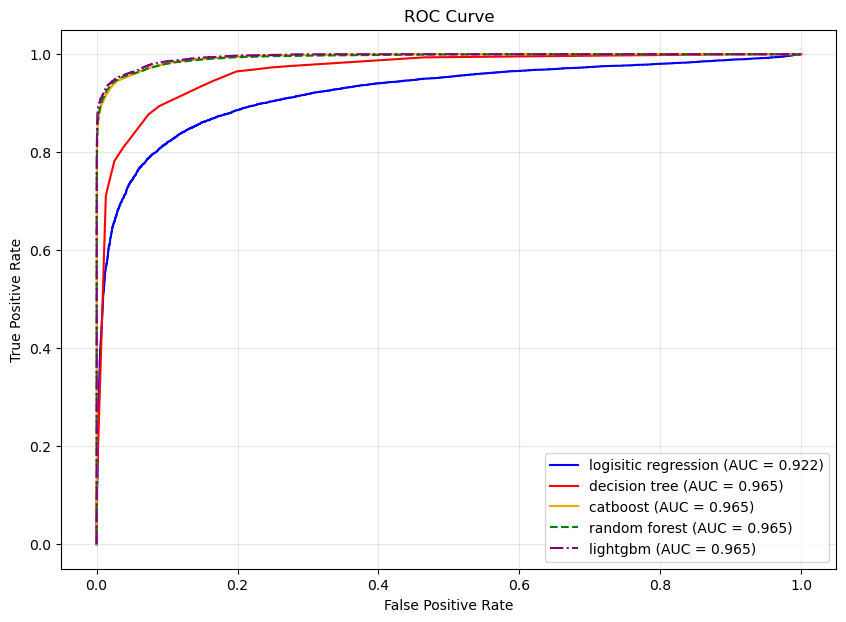

In [ ]:
# ROC Curve visualization
plt.figure(figsize=(10, 7))
plt.plot(lr_fpr, lr_tpr, color='blue', label=f'logisitic regression (AUC = {lr_roc_auc:.3f})')
plt.plot(dt_fpr, dt_tpr, color='red', label=f'decision tree (AUC = {dt_roc_auc:.3f})')
plt.plot(cat_fpr, cat_tpr, color='orange', label=f'catboost (AUC = {dt_roc_auc:.3f})')
plt.plot(rf_fpr, rf_tpr, color='green', linestyle='--', label=f'random forest (AUC = {dt_roc_auc:.3f})')
plt.plot(lgb_fpr, lgb_tpr, color='purple', linestyle='-.', label=f'lightgbm (AUC = {dt_roc_auc:.3f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# hyperparameter tuning

# explainability

- glassbox

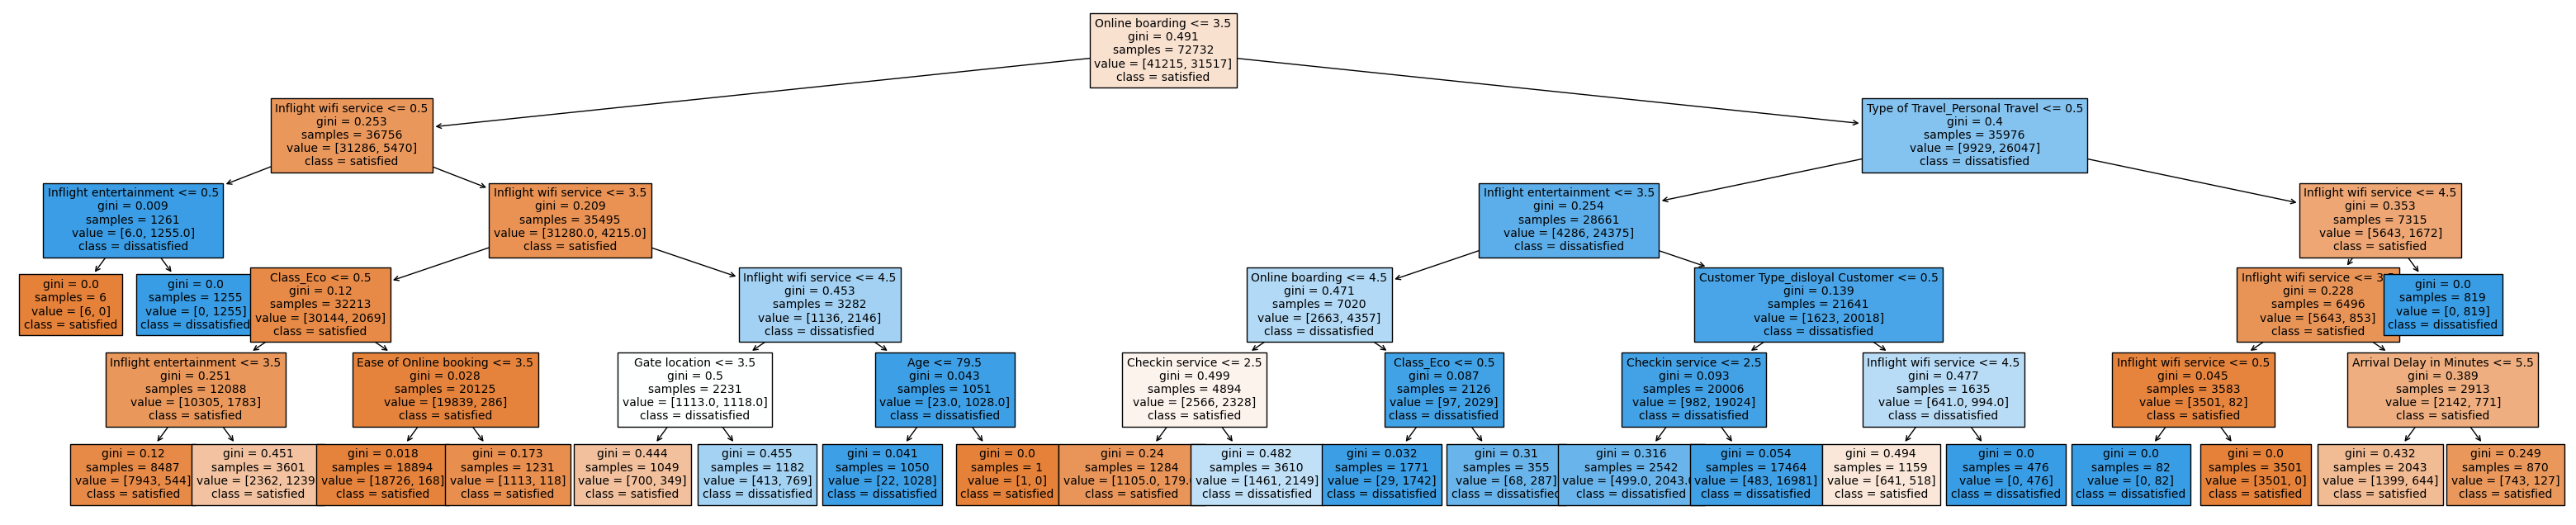

In [ ]:
# Decision Tree visualization
plt.figure(figsize=(40, 8))
plot_tree(dt_model, feature_names=cols, class_names=['satisfied','dissatisfied'], filled=True, fontsize=10)
plt.show()

# SHAP

- decision tree

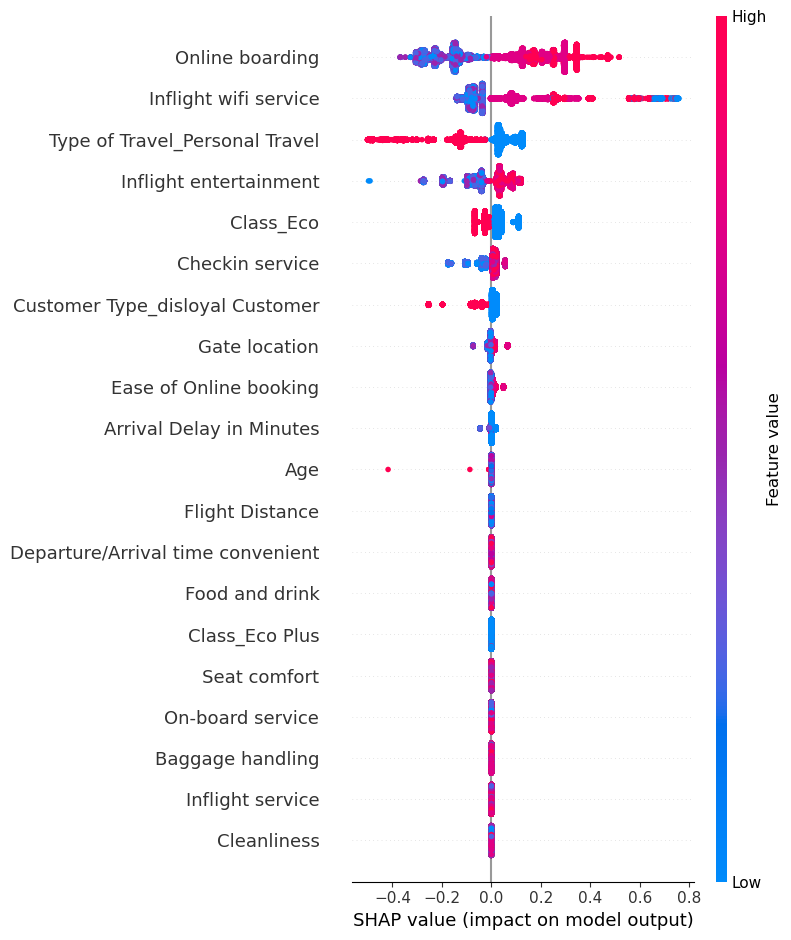

In [ ]:
import numpy as np
import shap
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_test)

# Global SHAP Summary Plot
shap.summary_plot(shap_values[:, :, 1], pd.DataFrame(X_test, columns=cols), feature_names=np.array(cols))

- catboost

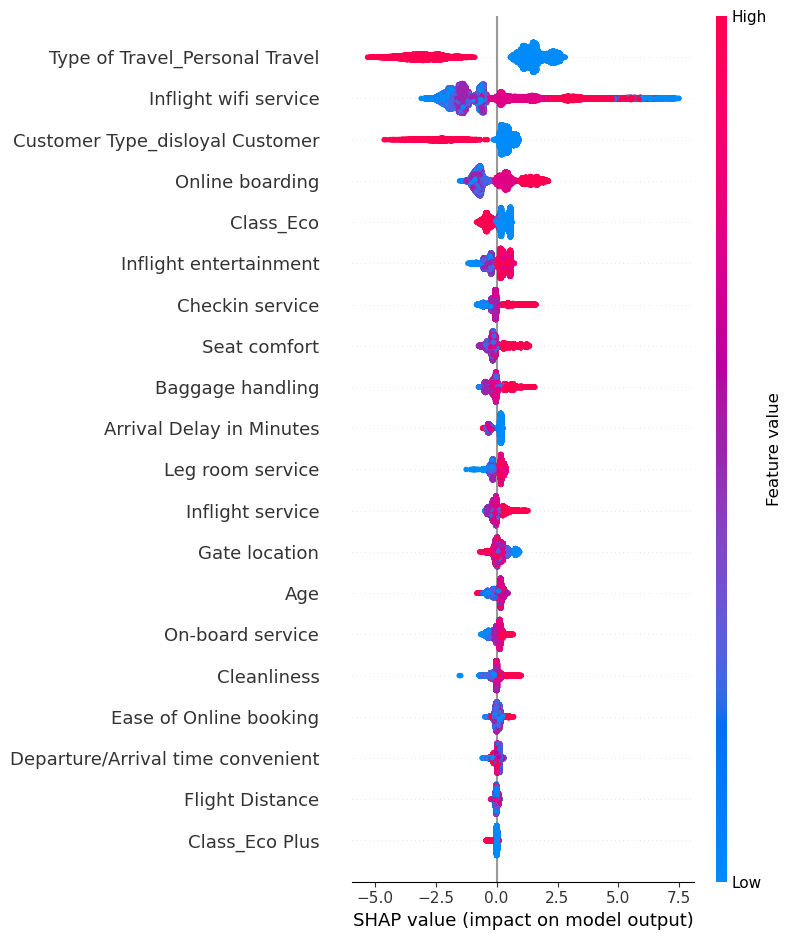

In [ ]:
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)

# Global SHAP Summary Plot
shap.summary_plot(shap_values, pd.DataFrame(X_test, columns=cols), feature_names=np.array(cols))

- random forest

In [ ]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Global SHAP Summary Plot
shap.summary_plot(shap_values, pd.DataFrame(X_test, columns=cols), feature_names=np.array(cols))

In [68]:
# shap.initjs()

In [ ]:
# class 1's expected_value SHAP value
expected_value_class1 = explainer.expected_value[1]
shap_values_class1 = shap_values[:, :, 1]

# sample data, SHAP value
sample_shap_values = shap_values_class1[0]
sample_data = X_test.iloc[0] if isinstance(X_test, pd.DataFrame) else X_test[0]

# Force plot
shap.force_plot(expected_value_class1, sample_shap_values, sample_data)

- catboost